# Chapter 5 정규선형모델

# 5.1 연속형 독립변수가 하나인 모델 (단순회귀) 

5.1.1 분석 준비

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/Colab\ Notebooks/StatisticsWithPython/code/chap05

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

5.1.2 데이터 읽어 들이기와 표시

In [2]:
beer = pd.read_csv("../../data/5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


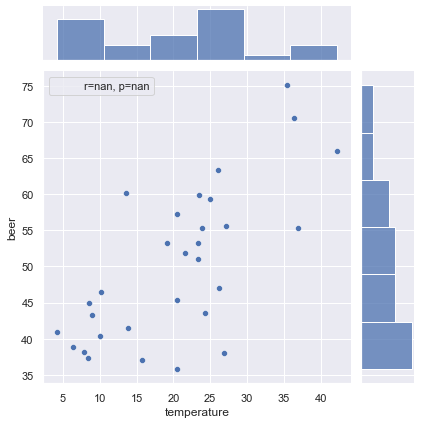

In [9]:
graph = sns.jointplot(x="temperature", y="beer", data=beer)

x = beer["temperature"]
y = beer["beer"]

r, p = stats.pearsonr(x, y)

phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],[f'r={r:f}, p={p:f}'])

5.1.3 모델 구축

5.1.4 statsmodels를 이용한 모델링

In [ ]:
lm_model = smf.ols(formula = "beer ~ tempature", data=beer).fit()